In [ ]:
Domain – Chemical Industry focus – Classify chemical
Business challenge/requirement
FuPont is a leading chemical company across the globe. The Company is on a CSR (Corporate Social Responsibility) 
mission. It wants to identify biodegradable products based on a study of the relationships between chemical structure 
and biodegradation of molecules.

You as ML expert have to create a ML model 
to classify the chemical structure as 'Ready BioDegradable' – RB vs 'Not Ready Biodegradable' – NRB

Key issues
Data has lots of attributes and classification could be tricky
Considerations NONE
Data volume
- Approx 1055 records – file bio-degradabale-data.csv
Fields in Data
• Details in .ipynb notebook
Additional information - NA
Business benefits

Research can lead FuPont to create truly unique Biodegradable packaging material. This could lead to massive 
profits in future
 

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data='/Users/atul595525/Desktop/learning/Edureka_courses/Python_For_Data_Science/Module_14_Model_Selection_and_Boosting/bio-degradabale-data.csv'

df=pd.read_csv(data,sep=";",header=None)

df.head(8)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,RB
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,RB
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,RB
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,RB
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,RB
5,4.236,3.4286,0,0,0,0,0,28.6,2,4,...,0,0,0,3.351,2.556,0,7.904,0,0,RB
6,5.000,5.0476,1,0,0,0,0,11.1,0,3,...,0,0,1,4.712,4.583,0,9.303,0,0,RB
7,4.525,3.8301,0,0,0,0,0,31.6,3,2,...,0,0,0,3.379,2.143,0,7.950,0,0,RB


In [18]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
count,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,...,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000,1055.000000
mean,4.782644,3.069508,0.716588,0.042654,0.980095,0.290047,1.646445,37.055640,1.376303,1.803791,...,0.129858,0.883412,1.274882,0.961137,3.918240,2.558417,0.686256,8.629492,0.051185,0.723223
std,0.546916,0.831308,1.462452,0.256010,2.332955,1.073771,2.224822,9.144466,1.963521,1.775435,...,0.644057,1.520467,2.273994,1.257013,0.999602,0.642765,1.090389,1.241986,0.318970,2.239286
min,2.000000,0.803900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,2.267000,1.467000,0.000000,4.917000,0.000000,0.000000
25%,4.481000,2.502750,0.000000,0.000000,0.000000,0.000000,0.000000,30.450000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.487500,2.103000,0.000000,7.991000,0.000000,0.000000
50%,4.828000,3.046300,0.000000,0.000000,0.000000,0.000000,1.000000,37.500000,1.000000,2.000000,...,0.000000,0.000000,0.000000,1.000000,3.726000,2.458000,0.000000,8.499000,0.000000,0.000000
75%,5.125000,3.437650,1.000000,0.000000,1.000000,0.000000,3.000000,43.400000,2.000000,3.000000,...,0.000000,1.000000,2.000000,2.000000,3.987000,2.870500,1.000000,9.020500,0.000000,0.000000
max,6.496000,9.177500,12.000000,3.000000,36.000000,13.000000,18.000000,60.700000,24.000000,12.000000,...,8.000000,12.000000,18.000000,7.000000,10.695000,5.825000,8.000000,14.700000,4.000000,27.000000


In [19]:
print('Missing values:\n{}'.format(df.isnull().sum()))

# Find duplicated records
print('\nNumber of duplicated records: {}'.format(df.duplicated().sum()))

# Find the unique values of 'diagnosis'.
#print('\nUnique values of "diagnosis": {}'.format(df['41'].unique()))

Missing values:
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
30    0
31    0
32    0
33    0
34    0
35    0
36    0
37    0
38    0
39    0
40    0
41    0
dtype: int64

Number of duplicated records: 3


In [20]:
df.shape

(1055, 42)

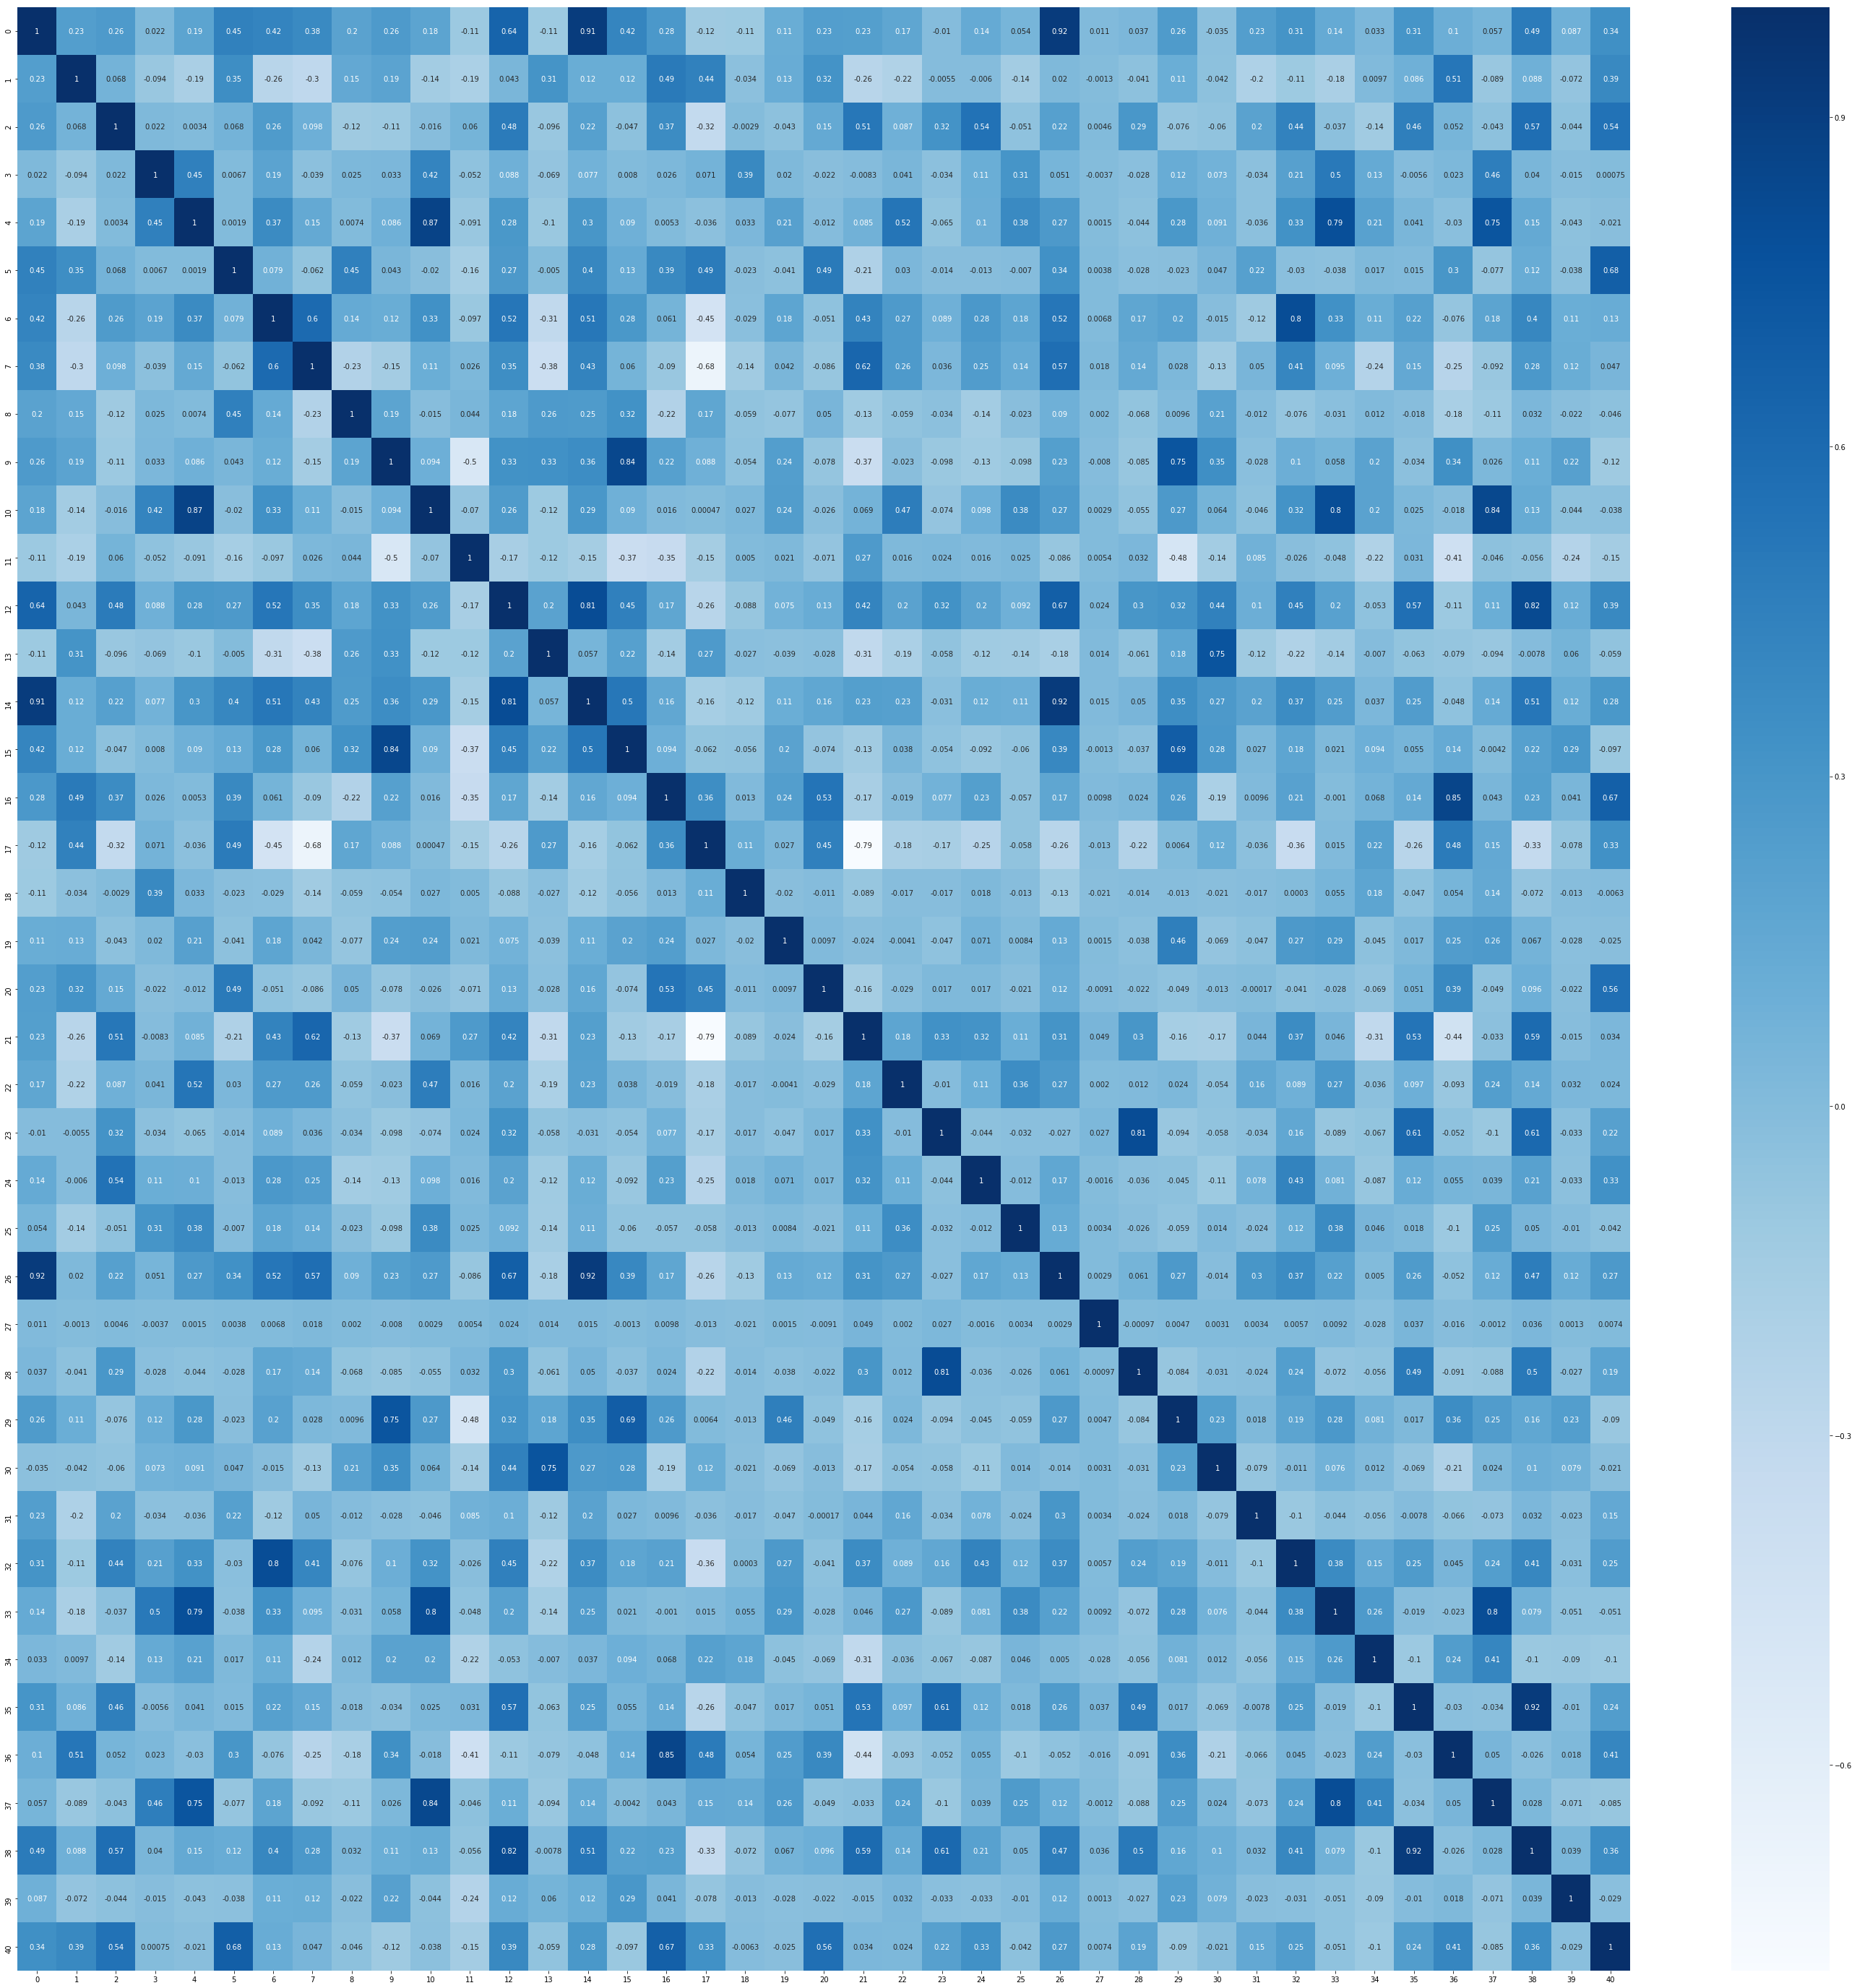

In [21]:
#finding correlation

import matplotlib.pyplot as plt
import seaborn as sns

df_corr = df.iloc[:, 0:41].corr()
plt.figure(figsize=(50,50))
sns.heatmap(df_corr, cmap="Blues", annot=True)
plt.show()

In [22]:
#There are no missing values or duplicated records. Next the diagnosis distribution is checked.
total = df[41].count()
RB = df[df[41] == "RB"][41].count()
print("RB: ", RB)
print("NRB: ", total - RB)

RB:  356
NRB:  699


In [23]:
df.count()

0     1055
1     1055
2     1055
3     1055
4     1055
5     1055
6     1055
7     1055
8     1055
9     1055
10    1055
11    1055
12    1055
13    1055
14    1055
15    1055
16    1055
17    1055
18    1055
19    1055
20    1055
21    1055
22    1055
23    1055
24    1055
25    1055
26    1055
27    1055
28    1055
29    1055
30    1055
31    1055
32    1055
33    1055
34    1055
35    1055
36    1055
37    1055
38    1055
39    1055
40    1055
41    1055
dtype: int64

In [24]:
df[41] = df[41].map({'RB':1,'NRB':0})

In [25]:
df.head(8)

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,2.949,1.591,0,7.253,0,0,1
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,3.315,1.967,0,7.257,0,0,1
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,1,3.076,2.417,0,7.601,0,0,1
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,1,3.046,5.000,0,6.690,0,0,1
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,3.351,2.405,0,8.003,0,0,1
5,4.236,3.4286,0,0,0,0,0,28.6,2,4,...,0,0,0,3.351,2.556,0,7.904,0,0,1
6,5.000,5.0476,1,0,0,0,0,11.1,0,3,...,0,0,1,4.712,4.583,0,9.303,0,0,1
7,4.525,3.8301,0,0,0,0,0,31.6,3,2,...,0,0,0,3.379,2.143,0,7.950,0,0,1


In [26]:
X=df.iloc[:,0:41]
Y=df.iloc[:,41]

In [27]:
X.head(7)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,40
0,3.919,2.6909,0,0,0,0,0,31.4,2,0,...,0,0,0,0,2.949,1.591,0,7.253,0,0
1,4.170,2.1144,0,0,0,0,0,30.8,1,1,...,0,0,0,0,3.315,1.967,0,7.257,0,0
2,3.932,3.2512,0,0,0,0,0,26.7,2,4,...,0,0,0,1,3.076,2.417,0,7.601,0,0
3,3.000,2.7098,0,0,0,0,0,20.0,0,2,...,0,0,0,1,3.046,5.000,0,6.690,0,0
4,4.236,3.3944,0,0,0,0,0,29.4,2,4,...,0,0,0,0,3.351,2.405,0,8.003,0,0
5,4.236,3.4286,0,0,0,0,0,28.6,2,4,...,0,0,0,0,3.351,2.556,0,7.904,0,0
6,5.000,5.0476,1,0,0,0,0,11.1,0,3,...,0,0,0,1,4.712,4.583,0,9.303,0,0


In [ ]:
'''
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(train_x)
x_test = sc.transform(test_x)

'''

In [28]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=5)

In [29]:
#applying KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn=KNeighborsClassifier(n_neighbors=4)

knn.fit(x_train,y_train)

y_pred=knn.predict(x_test)

accuracy=metrics.accuracy_score(y_test,y_pred)

print(accuracy)


0.8293838862559242


In [30]:
#applying logistic reg

from sklearn.linear_model import LogisticRegression

lgr=LogisticRegression()

lgr.fit(x_train,y_train)

y_pred_new=lgr.predict(x_test)

accuracy=metrics.accuracy_score(y_test,y_pred_new)

print(accuracy)



0.8767772511848341


In [31]:
#DEFINING 10 FOLD KNN MODEL
#RUNNING CROSS_VALIDATION

from sklearn.model_selection import cross_val_score

knn=KNeighborsClassifier(n_neighbors=4)

print(cross_val_score(knn,X,Y,cv=10,scoring='accuracy').mean())

0.8254319579791278


In [33]:
#applying adaboost boosting algorithm

from sklearn.model_selection import KFold
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier


kfold=KFold(n_splits=10,random_state=7)


model=AdaBoostClassifier(n_estimators=30,random_state=7)

results=model_selection.cross_val_score(model,X,Y,cv=kfold)

print(results.mean())

0.8133423180592991


In [34]:
# print(metrics.classification_report(expected, predicted))

print(metrics.classification_report(y_test, y_pred))



             precision    recall  f1-score   support

          0       0.85      0.91      0.88       141
          1       0.78      0.67      0.72        70

avg / total       0.83      0.83      0.83       211



In [35]:
#CONFUSION_MATRIX
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' + str(accuracy_score(y_test, y_pred)))



[[128  13]
 [ 23  47]]
Accuracy0.8293838862559242
